In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madhumithacse","key":"98f3883d5dfd0a2b6e510f51b9ce99f0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vijaykumar1799/face-mask-detection

!unzip face-mask-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/with_mask/1890.png  
  inflating: Dataset/with_mask/1891.png  
  inflating: Dataset/with_mask/1892.png  
  inflating: Dataset/with_mask/1893.png  
  inflating: Dataset/with_mask/1894.png  
  inflating: Dataset/with_mask/1895.png  
  inflating: Dataset/with_mask/1896.png  
  inflating: Dataset/with_mask/1897.png  
  inflating: Dataset/with_mask/1898.png  
  inflating: Dataset/with_mask/1899.png  
  inflating: Dataset/with_mask/19.png  
  inflating: Dataset/with_mask/190.png  
  inflating: Dataset/with_mask/1900.png  
  inflating: Dataset/with_mask/1901.png  
  inflating: Dataset/with_mask/1902.png  
  inflating: Dataset/with_mask/1903.png  
  inflating: Dataset/with_mask/1904.png  
  inflating: Dataset/with_mask/1905.png  
  inflating: Dataset/with_mask/1906.png  
  inflating: Dataset/with_mask/1907.png  
  inflating: Dataset/with_mask/1908.png  
  inflating: Dataset/with_mask/1909.png  
  inflating: Dataset/with_ma

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Img_size=224
Batch_size=32

In [ ]:
train_data=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [ ]:
train_generator=train_data.flow_from_directory(
    '/content/Dataset',
    target_size=(Img_size,Img_size),
    batch_size=Batch_size,
    class_mode='categorical',
    subset='training'
    )

Found 7188 images belonging to 3 classes.


In [ ]:
val_generator=train_data.flow_from_directory(
    '/content/Dataset',
    target_size=(Img_size,Img_size),
    batch_size=Batch_size,
    class_mode='categorical',
    subset='validation'
    )

Found 1794 images belonging to 3 classes.


In [ ]:
class_indices=train_generator.class_indices
print(class_indices)

{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}


In [ ]:
class_names=list(class_indices.keys())
print(class_names)

['mask_weared_incorrect', 'with_mask', 'without_mask']


In [ ]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',input_shape=(Img_size, Img_size, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(3, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_generator,epochs = 5, validation_data = val_generator, batch_size = Batch_size,)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7406 - loss: 0.6721

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.7416 - loss: 0.6695 - val_accuracy: 0.9437 - val_loss: 0.1661
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9469 - loss: 0.1570 - val_accuracy: 0.9426 - val_loss: 0.1709
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9582 - loss: 0.1178 - val_accuracy: 0.9677 - val_loss: 0.1049
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.9834 - loss: 0.0486 - val_accuracy: 0.9604 - val_loss: 0.1187
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9879 - loss: 0.0330 - val_accuracy: 0.9660 - val_loss: 0.1104


In [ ]:
model.save('/content/drive/MyDrive/Mask_Detection/MaskDetection.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/Mask_Detection/MaskDetection.h5')
print('Model Loaded')

Model Loaded


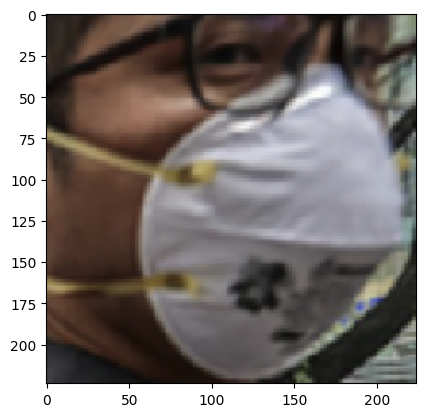

In [ ]:
test_image_path="/content/1002.png"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255

In [ ]:
import numpy as np
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
[[5.9006165e-04 9.9566180e-01 3.7481824e-03]]


In [ ]:
ind=np.argmax(prediction)
print(class_names[ind])

with_mask
